Jugend hackt Einsteiger Workshop
================================

---

> *Ich kann nicht programmieren, ich kann nur ein bisschen python*

Willkommen zum Einsteiger Workshop von Jugend hackt!

In diesem Workshop werdet ihr Grundlagen der Programmierung mit Python lernen.

Das ganze machen wir am Beispiel verschiedener Daten, welche von der Stadt Hamburg im [Transparenzportal](transparenz.hamburg.de) frei zu Verfügung gestellt werden.
Die von uns ausgewählten Daten haben gemeinsam, dass sie ortsbezogen sind. 
Wir wollen diese Daten auf einer Karte darstellen.
Dabei fixieren wir uns auf die einzelnen Stadtteile der Hansestadt.
Die Umrisse der einzelnen Stadtteil wurden aus [Open Street Map](www.openstreetmap.org), einem offenen, von vielen Freiwilligen gepflegten Kartendienst, exportiert.

Im folgenden Dokument sind zwei Arten von Inhalt zu finden: 

1. Erklärender Text, so wie dieser hier
2. Python Code, den wir ausführen wollen.

Auch wenn man keine Ahnung vom Programmieren hat, sollte man beides direkt erkennen können.
Im Code gibt es Zeilen die mit einem `#` beginnen. Dies sind Kommentare, welche weitere Informationen über den Code geben,
aber für das Verständis des Workshops nicht zwingend wichtig sind.
Falls ihr neugierig seid, könnt ihr diese also lesen und verstehen, wenn nicht könnt ihr es einfach bleiben lassen.

In [ ]:
# Wir müssen für unsere Darstellung eine Besonderheit beachten.
# Damit wir die Karte im Browser angezeigt bekommen, müssen wir einen speziellen Modus aktivieren.
%matplotlib inline

Die Mächtigkeit von Python liegt in der Philosopie "Batteries included" (Batterien beiliegend) begründet.
Für jede Aufgabe gibt es bereits ein passendes Werkzeug, dass man nur noch einsetzen muss.

Diese Werkzeuge werden 'Module' genannt und können in unser Skript importiert werden. 
Der Import kann an beliebiger Stelle erfolgen, es gehört allerdings zum guten Stil dies am Anfang der Datei zu machen.

In [ ]:
# Die Daten die wir verarbeiten wollen liegen im Format "GeoJSON" vor.
# Auch hierfür gibt es eine Modul, welches uns die Daten laden lässt.
import geojson
# Koordinaten auf der Karte werden in Längen- und Breitengraden
# angegeben. Ein Teil der Koordinaten liegt jedoch nur in
# "Universal Transverse Mercator" Darstellung vor. Glücklicherweise
# existiert hierfür ein Modul, mit dem wir diese in die von uns
# benötigen Längen- und Breitengrade konvertieren können.
# Wir müssen daher nicht verstehen wie dieses System im speziellen
# aufgebaut ist.
import utm
# Zum Zusammenfassen von größeren Datenmengen verwenden wir das
# "collections" (Sammlungen) Modul.
import collections

# Für den Workshop haben wir ein gesondertes Modul entwickelt, dass
# Hamburg für uns zeichnen kann.
import hamburg

Nachdem wir alle benötigten Module geladen haben, können wir mit dem eigentlichen Skript beginnen.

Zuerst laden wir die Karteninformationen.

In [ ]:
raw = geojson.load(open("data/hamburg.geojson"))

Aus den vorliegenden Rohdaten wolen wir die Grenzen der Stadtteile extrahieren.
Hierfür müssen wir nur die *features* berücksichtigen, welche als `"Stadtteil"` markiert sind.

In [ ]:
regions = []
for feature in raw['features']:
    if feature['properties'].get('name:prefix') == "Stadtteil":
        regions.append(feature)

Im nächsten Schritt ordnen wir jedem Stadtteil (definiert nur den Namen), den entsprechenden Umriss zu.
Dabei ignorieren wir Stadtteile die keinen Namen haben.
Ebenso werden Stadtteile ignoriert die keine Umrisse haben.

In [ ]:
borders = {}
for region in regions:
    if region['properties'].get('name') is not None and region['geometry']['type'] in ['Polygon', 'MultiPolygon']:
        if region['geometry']['type'] == 'Polygon':
            borders[region['properties'].get('name')] = (region['geometry']['coordinates'][0], )
        else:
            borders[region['properties'].get('name')] = tuple(map(lambda p: p[0], region['geometry']['coordinates']))

Exemplarisch wolllen wir jetzt die Schule Anzahl der Schulen pro Stadtteil zählen.
Hierfür laden wir den Datensatz über die Schulen in Hamburg.

In [ ]:
raw_data = geojson.load(open("data/schulen.geojson"))
schools = []
for feature in raw_data['features']:
    schools.append({
        'name': feature['properties'].get('Name'),
        'region': feature['properties'].get('stadtteil'),
        'position': utm.to_latlon(feature['geometry']['coordinates'][0],
                                  feature['geometry']['coordinates'][1],
                                  32, 'N'), # Die Koordinaten sind im Sektor 32N
    })

Jetzt zählen wir die Anzahl Schulen in jedem Stadtteil

In [ ]:
count = collections.defaultdict(int)
for school in schools:
    count[school['region']] += 1

Wir können uns den Inhalt der Zählung anschauen.

Zum Abschluss zeichnen wir die Positionen der Schulen, die Stadteile und zeigen die Karte an 

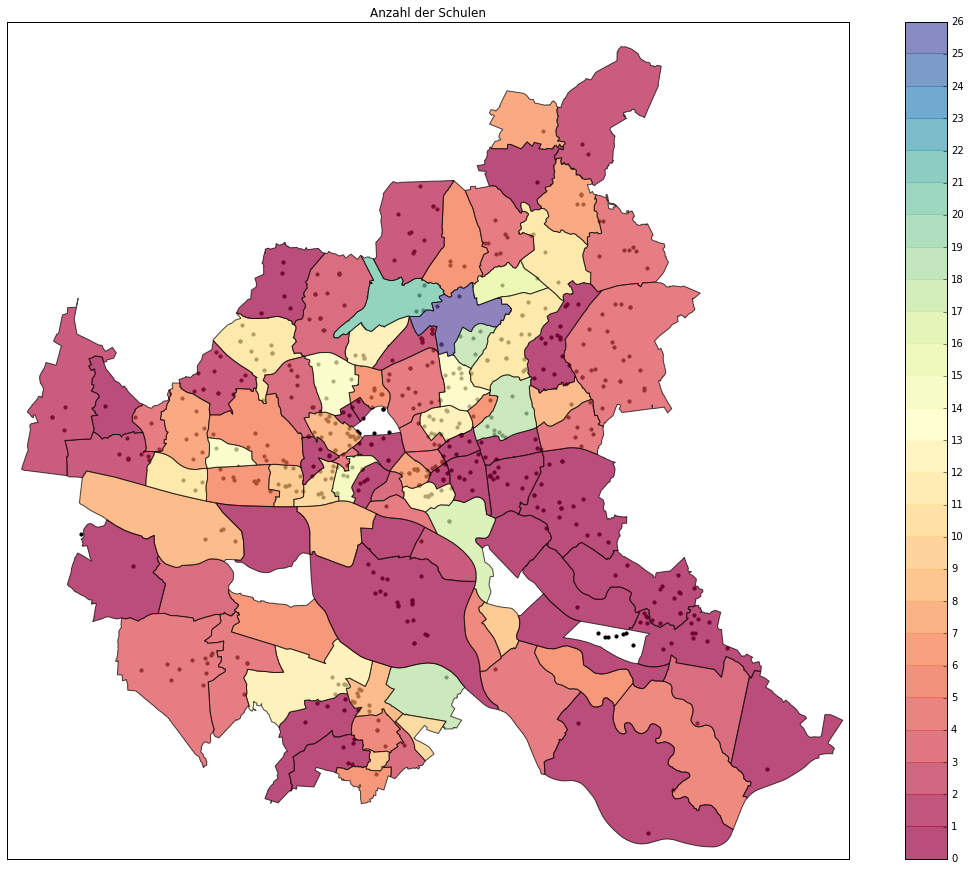

In [ ]:
# Zuerst zeichnen wir die Positionen der Schulen
hamburg.draw_positions(schools)

# Dann zeichnen wir die einzelnen Stadtteile
hamburg.draw_regions(borders, count)

# Jede Darstellung sollte einen Titel bekommmen.
hamburg.set_title("Anzahl der Schulen")